In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df=pd.read_csv('Algerian_Forest_Fires_Dataset_Update_Cleaned.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [2]:
df.columns

NameError: name 'df' is not defined

In [ ]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

## Encoding

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Dependent and Independ Variables

In [ ]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

## Feature Selection Based on Correlation

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


## Feature Selection

### Check Multi_Collinearty

<Axes: >

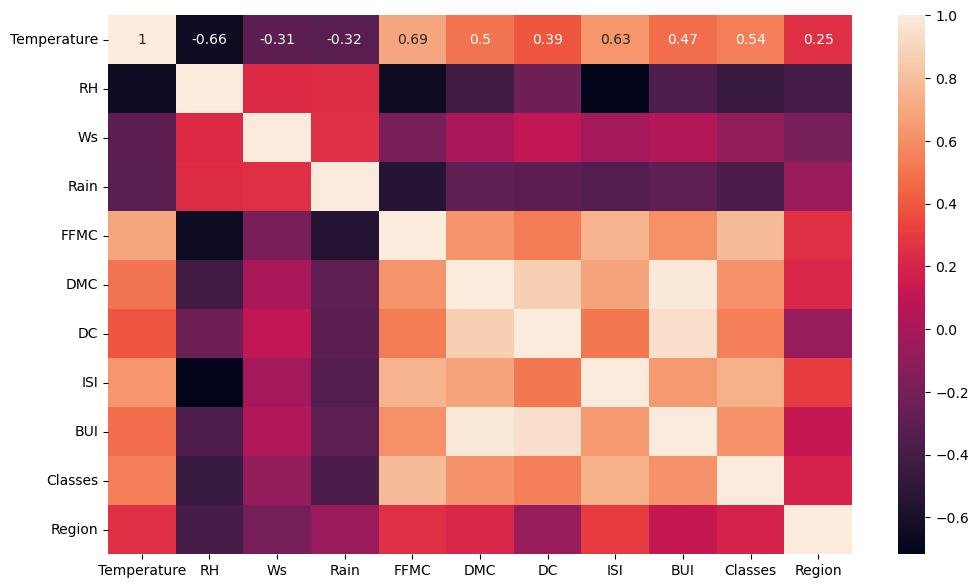

In [ ]:
plt.figure(figsize=(12,7))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def corrleation(dataset,threshold):
     col_corr = set()
     corr_matrix = dataset.corr()
     for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
     return col_corr

## threshold--Domain expertise

In [ ]:
corr_feature=corrleation(X_train,0.85)

In [ ]:
corr_feature

{'BUI', 'DC'}

## Drop features when correlation is more than 0.85

In [ ]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Selection or Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test_scaled=scaler.fit_transform(X_test)
X_train_scaled=scaler.transform(X_train)
X_train_scaled.shape,X_test_scaled.shape

((182, 9), (61, 9))

In [ ]:
X_test_scaled

array([[-3.73215184e-01,  1.86526055e-01, -7.56034558e-02,
        -3.93465417e-01,  5.75516485e-01, -2.71484039e-02,
         3.33219559e-01,  8.05387266e-01, -1.01653005e+00],
       [ 2.18112770e-01, -5.15825141e-01, -6.90511563e-01,
        -3.93465417e-01,  6.80353750e-01, -3.98035193e-01,
         5.29474389e-01,  8.05387266e-01, -1.01653005e+00],
       [-1.26020712e+00, -2.34884662e-01,  8.46758705e-01,
         1.07328622e+00, -1.03198825e+00, -9.75928561e-01,
        -9.28418633e-01, -1.24163870e+00,  9.83738754e-01],
       [ 5.13776747e-01, -2.34884662e-01, -6.90511563e-01,
        -2.60124359e-01,  7.22976113e-02,  3.60988933e-01,
        -6.76090995e-01, -1.24163870e+00,  9.83738754e-01],
       [-6.68879162e-01,  2.56761175e-01, -3.83057509e-01,
        -3.93465417e-01,  4.84657521e-01,  1.28106531e-01,
        -3.21729229e-03,  8.05387266e-01,  9.83738754e-01],
       [ 1.99209663e+00,  1.86526055e-01, -1.92032778e+00,
         4.06580931e-01, -3.26083997e-01, -2.427802

In [ ]:
X_train_scaled

array([[-0.96454314,  0.88887725,  1.15421276, ..., -0.67609099,
        -1.2416387 , -1.01653005],
       [-0.37321518,  0.74840701, -0.38305751, ..., -1.04056425,
        -1.2416387 ,  0.98373875],
       [ 2.28776061, -2.13123289, -0.07560346, ...,  3.38918762,
         0.80538727,  0.98373875],
       ...,
       [-2.14719905,  1.02934749,  0.53930465, ..., -1.20878268,
        -1.2416387 , -1.01653005],
       [ 0.51377675, -0.16464954,  0.2318506 , ...,  0.80983843,
         0.80538727,  0.98373875],
       [-0.66887916,  1.09958261,  1.76912087, ..., -0.95645504,
        -1.2416387 , -1.01653005]])

## Box Plots To understand Effect Of Standard Scaler

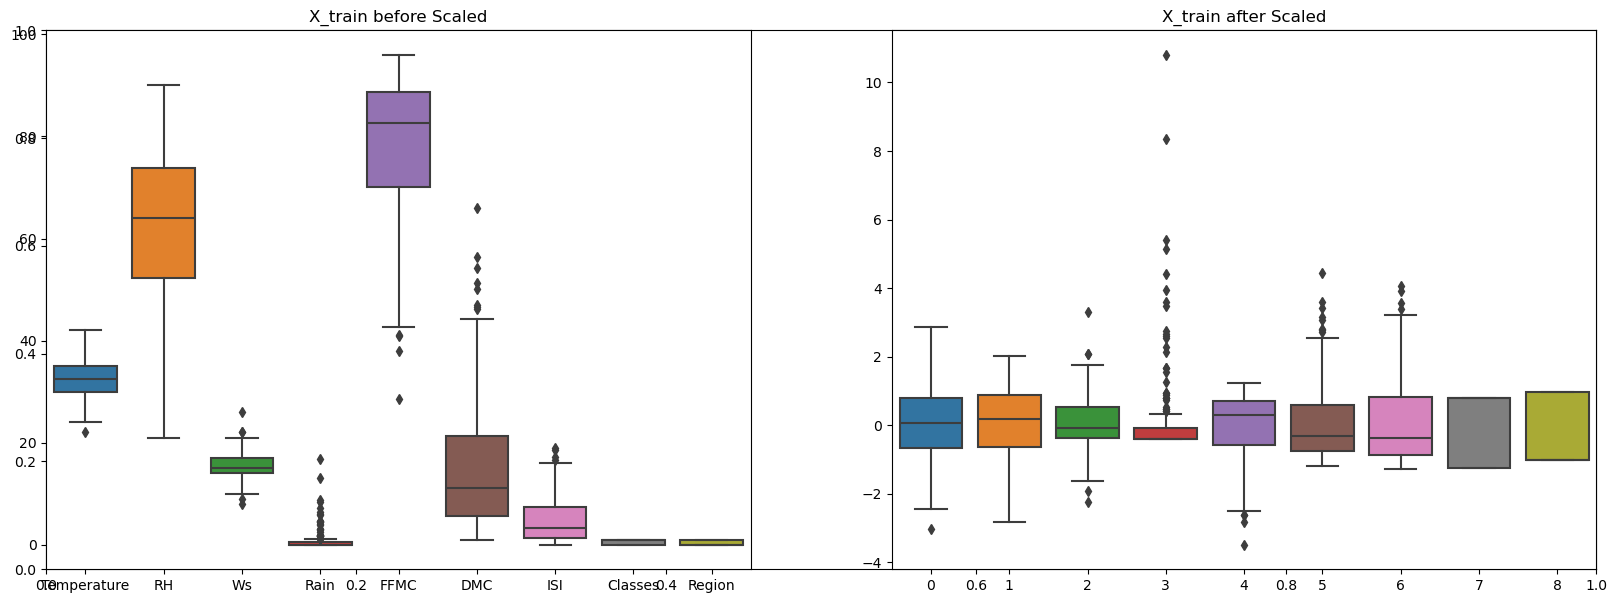

In [ ]:
plt.subplots(figsize=(20,7))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaled')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaled')
plt.show()

# Models

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print('R2-scrore',score)

Mean Absolute Error 0.5468236465249984
R2-scrore 0.9847657384266952


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean  Absolute Error",mae)
print("R2-Score",score)

Mean  Absolute Error 1.0500757831304819
R2-Score 0.9552076016598269


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2-Score",score)

Mean Absolute Error 0.5584348063763342
R2-Score 0.9844893094550833


## Elastic_Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Eroor",mae)
print("R2-Score",score)

Mean Absolute Eroor 1.6314801580997713
R2-Score 0.9042128090157637


## Pickling

In [ ]:
import pickle

In [ ]:
pickle.dump(scaler,open('Scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))